C:\Users\oderd\AppData\Local\Temp\ipykernel_8372\3725977256.py:56: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Geburtstag'] = pd.to_datetime(data['Geburtstag'])
C:\Users\oderd\AppData\Local\Temp\ipykernel_8372\3725977256.py:58: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['stichtag'] = pd.to_datetime('31.12.2005')
C:\Users\oderd\AppData\Local\Temp\ipykernel_8372\3725977256.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maenner['Altersklassen'] = pd.cut(maenner['Alter'], alter_klassen, labels = alt

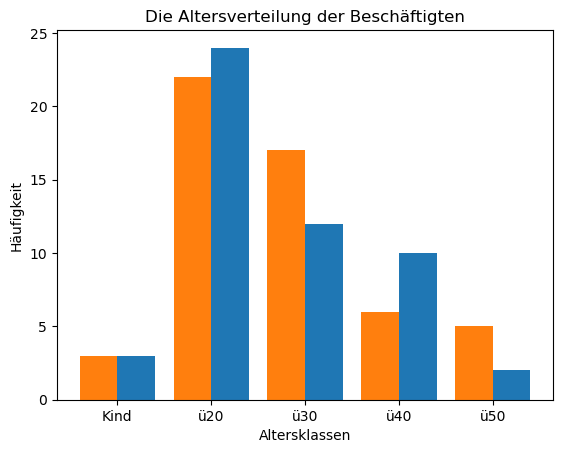

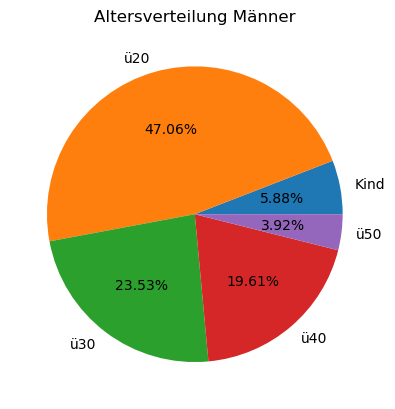

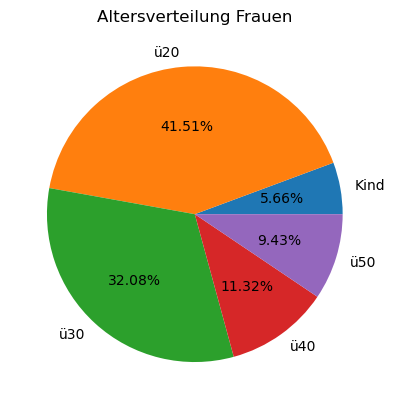

C:\Users\oderd\AppData\Local\Temp\ipykernel_8372\3725977256.py:104: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  hf = pd.value_counts (data['Altersklassen'], sort = False).rename_axis('Altersklassen').reset_index(name = 'Häufigkeit')


,Altersklassen,Häufigkeit,rel. Häufigkeit,Mittelwert,Varianz,Median,Standardabweichung,Spannweite
0,Kind,3,5.66,10.6,70.3,6.0,8.3845,19
1,ü20,22,41.51,10.6,70.3,6.0,8.3845,19
2,ü30,17,32.08,10.6,70.3,6.0,8.3845,19
3,ü40,6,11.32,10.6,70.3,6.0,8.3845,19
4,ü50,5,9.43,10.6,70.3,6.0,8.3845,19


In [15]:
import pandas as pd
data = pd.read_csv(r'..\datasets\Testat1.txt',
                   encoding = 'ISO-8859-1',
                   sep = ';',
                   na_values = '.',
                   header = None,
                   names = ['Nr', 'Geschlecht', 'Vorname', 'Nachname', 'Geburtstag'])

#ersetzterWert1 = data.loc[data['Geburtstag'] == 'January 6th, 1973']
data.at[8, 'Geburtstag'] = '06.01.1973'
#ersetzterWert2 = data.loc[data['Geburtstag'] == 'am 26. Oktober 1966']
data.at[24, 'Geburtstag'] = '26.10.1966'
#deletedWert1 = data.loc[data['Geburtstag'] == 'OTscOPtrEb']
data = data.drop([33], axis=0)
data.at[34, 'Geburtstag'] = '17.08.1941'
#deletedWert2 = data.loc[data['Geburtstag'] == '03.']
data = data.drop([49], axis=0)
#deletedWert3 = data.loc[data['Geburtstag'] == '18.05.3774']
data = data.drop([57], axis=0)
#deletedWert4 = data.loc[data['Geburtstag'] == '30.03.25409']
data = data.drop([60], axis=0)
#deletedWert5 = data.loc[data['Geburtstag'] == 'xxxx']
data = data.drop([62], axis=0)
#deletedWert6 = data.loc[data['Geburtstag'] == '----']
data = data.drop([64], axis=0)
#ersetzterWert3 = data.loc[data['Geburtstag'] == 'November 22nd, 1941']
data.at[65, 'Geburtstag'] = '22.11.1941'
data = data.drop([84], axis=0)
#deletedWert7 = data.loc[data['Geburtstag'] == 'xxxx']
data = data.drop([108], axis=0)

data.reset_index(drop = True)

#gelöschteDaten = pd.DataFrame({
#    'Gelöschte Daten':[ 
#    deletedWert1,
#    deletedWert2,
#    deletedWert3,
#    deletedWert4,
#    deletedWert5,
#    deletedWert6,
#    deletedWert7]
#})

#ersetzteDaten = pd.DataFrame({
#    'Ersetzte Daten':[
#        ersetzterWert1,
#        ersetzterWert2,
#        ersetzterWert3]
#})
    
#data.head()
#ersetzteDaten.head()
#gelöschteDaten.head()

data['Geburtstag'] = pd.to_datetime(data['Geburtstag'])
data['Geburtsjahr'] = data['Geburtstag'].dt.year
data['stichtag'] = pd.to_datetime('31.12.2005')
data['stichjahr'] = data['stichtag'].dt.year

data['Alter'] = data['stichjahr'] - data['Geburtsjahr']
#data.head()

alter_klassen = [0, 20, 30, 40, 50, 100]
alter_eigennamen = ['Kind', 'ü20', 'ü30', 'ü40', 'ü50']

maenner = data[data['Geschlecht']=='Herr']
frauen = data [data['Geschlecht']=='Frau']
maenner['Altersklassen'] = pd.cut(maenner['Alter'], alter_klassen, labels = alter_eigennamen)
frauen['Altersklassen'] = pd.cut(frauen['Alter'], alter_klassen, labels = alter_eigennamen)

hfM = pd.value_counts(maenner['Altersklassen'], sort = False).rename_axis('Altersklassen').reset_index(name = 'Häufigkeit')
hfW = pd.value_counts(frauen['Altersklassen'], sort = False).rename_axis('Altersklassen').reset_index(name = 'Häufigkeit')

m = hfM['Häufigkeit'].sum()
w = hfW['Häufigkeit'].sum()

hfM['rel. Häufigkeit'] = (hfM['Häufigkeit']/m*100).round(2)
hfW['rel. Häufigkeit'] = (hfW['Häufigkeit']/w*100).round(2)

import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
xAxis =  np.arange(len(hfW['Altersklassen'][0:5]))

plt.bar(xAxis+0.2, hfM['Häufigkeit'][0:5], width=0.4)
plt.bar(xAxis-0.2, hfW['Häufigkeit'][0:5], width=0.4)
plt.xticks(xAxis, hfM['Altersklassen'][0:5])

plt.xlabel('Altersklassen')
plt.ylabel('Häufigkeit')
plt.title('Die Altersverteilung der Beschäftigten')
plt.show()

plt.title('Altersverteilung Männer')
plt.pie(hfM['Häufigkeit'], labels = hfM['Altersklassen'], autopct='%1.2f%%')
plt.show()

plt.title('Altersverteilung Frauen')
plt.pie(hfW['Häufigkeit'], labels = hfW['Altersklassen'], autopct='%1.2f%%')
plt.show()

data['Altersklassen'] = pd.cut(data['Alter'], alter_klassen, labels = alter_eigennamen)
hf = pd.value_counts (data['Altersklassen'], sort = False).rename_axis('Altersklassen').reset_index(name = 'Häufigkeit')

hf['Mittelwert'] = hf['Häufigkeit'].mean()
hf['Varianz'] = hf['Häufigkeit'].var()
hf['Median'] = hf ['Häufigkeit'].median()
hf['Standardabweichung'] = round(hf ['Häufigkeit'].std(), 4)
hf['Spannweite'] = hf['Häufigkeit'].max() - hf['Häufigkeit'].min()

hfM['Mittelwert'] = hfM['Häufigkeit'].mean()
hfM['Varianz'] = hfM['Häufigkeit'].var()
hfM['Median'] = hfM['Häufigkeit'].median()
hfM['Standardabweichung'] = round(hfM['Häufigkeit'].std(), 4)
hfM['Spannweite'] = hfM['Häufigkeit'].max() - hfM['Häufigkeit'].min()

hfW['Mittelwert'] = hfW['Häufigkeit'].mean()
hfW['Varianz'] = hfW['Häufigkeit'].var()
hfW['Median'] = hfW['Häufigkeit'].median()
hfW['Standardabweichung'] = round(hfW['Häufigkeit'].std(), 4)
hfW['Spannweite'] = hfW['Häufigkeit'].max() - hfW['Häufigkeit'].min()








